In [1]:
from typing import Dict, Tuple, List, Any, Optional, Set, Union, Callable
from tqdm import tqdm
import os
import json
from collections import defaultdict


In [3]:

train_folder_annots = r'../data/ChartQA/ChartQA Dataset/train/annotations'
train_folder_images = r'../data/ChartQA/ChartQA Dataset/train/png'
json_annotation_list: List[Dict[str, Union[str, dict]]] = []
for filename in tqdm(os.listdir(train_folder_annots), desc='Reading image and annotation...'):
    full_path = os.path.join(train_folder_annots, filename)
    with open(full_path, 'r') as f:
        json_dict = json.load(f)
    image_path = os.path.join(
        train_folder_images, filename.replace(".json", ".png"))
    information = {
        'json_name': filename,
        'full_path': full_path,
        'data': json_dict,
        'image_path': image_path
    }
    json_annotation_list.append(information)

Reading image and annotation...:   0%|          | 0/18317 [00:00<?, ?it/s]

Reading image and annotation...: 100%|██████████| 18317/18317 [00:08<00:00, 2077.70it/s]


In [4]:
def extract_structure(data: dict) -> dict:
    """
    Extracts the structure of a JSON object by replacing values with placeholders.
    """
    if isinstance(data, dict):
        return {key: extract_structure(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [extract_structure(data[0])] if data else []
    else:
        return "value"


def find_unique_structures(json_list: list[dict], json_info_full) -> Dict[str, List[dict]]:
    """Read through each json, find the unique structure, and assign each structure, with a list of json that is represented by that structure

    Args:
        json_list (list[dict]): List of annotation
        json_info_full (_type_): The list of full annotation, including the full path and filename

    Returns:
        Dict[str, List[dict]]: return the mapping from a specific structure to the list of annotations(in full form, with filepath and filanem)
    """
    unique_structures_info = defaultdict(list)

    for i, json_data in tqdm(enumerate(json_list)):
        structure = extract_structure(json_data)

        structure_str = json.dumps(structure, sort_keys=True)

        unique_structures_info[structure_str].append(json_info_full[i])

    return len(unique_structures_info), unique_structures_info

In [5]:
info_only = [info['data'] for info in json_annotation_list]

In [6]:
len_unique_struct_scatter, unique_scatter = find_unique_structures(
    info_only,
    json_annotation_list
)

18317it [00:00, 33841.65it/s]


In [7]:
len_unique_struct_scatter

14

In [8]:
from pprint import pprint

In [9]:
import json
pprint(json.loads(list(unique_scatter.keys())[7]))

{'general_figure_info': {'figure_info': {'bbox': {'h': 'value',
                                                  'w': 'value',
                                                  'x': 'value',
                                                  'y': 'value'}},
                         'legend': {'items': [{'label': {'bbox': {'h': 'value',
                                                                  'w': 'value',
                                                                  'x': 'value',
                                                                  'y': 'value'},
                                                         'text': 'value'},
                                               'model': 'value'}]},
                         'title': {'bbox': {'h': 'value',
                                            'w': 'value',
                                            'x': 'value',
                                            'y': 'value'},
                                   'text': 'v

In [10]:
unique_pie_info = []
for pie_i in unique_scatter.keys():
    unique_pie_info.append(
        {
            'structure': json.loads(pie_i),
            'value_json_list': {
                'data': unique_scatter[pie_i],
                'valid': [True] * len(unique_scatter[pie_i])
            },
            'valid': True
        }
    )

In [ ]:
import cv2
import numpy as np

DATASET_NAME = 'ChartQA'
DICTIONARY = {


}
def annotate_image(image: np.ndarray, bbox: dict ) -> np.ndarray:
    """
    Annotate the image with the bounding boxes from the data.
    """
    
    x, y, w, h = map(int,bbox['x'], bbox['y'], bbox['w'], bbox['h'])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green bounding box
    return image

def deep_first_search_plot(data: dict, image: np.ndarray,DATA_NAME) -> np.ndarray:
    """
    Depth-first search to find and annotate 'bbox' or 'bboxes' keys in the structure.
    """
    data_dictionary = []
    data_dictionary =  DICTIONARY[DATA_NAME]['bbox_dictionary'] 
    if isinstance(data, dict):
        for key, value in data.items():
            if key in  data_dictionary:  # Single bounding box
                if isinstance(value, dict):
                    image = annotate_image(image, value)
                if isinstance(value, list):
                    for bbox in value:
                        image = annotate_image(image, bbox)
            else:
                # Recurse into nested structures
                image = deep_first_search_plot(value, image)
    elif isinstance(data, list):
        for item in data:
            if isinstance(item, (dict, list)):
                image = deep_first_search_plot(item, image)

    return image

{'data': {'general_figure_info': {'figure_info': {'bbox': {'h': 429,
                                                           'w': 632,
                                                           'x': 45,
                                                           'y': 106}},
                                  'legend': {'items': [{'label': {'bbox': {'h': 15.015625,
                                                                           'w': 125.078125,
                                                                           'x': 679,
                                                                           'y': 372},
                                                                  'text': 'Fourth '
                                                                          'child '
                                                                          '& '
                                                                          'higher'},
                                      

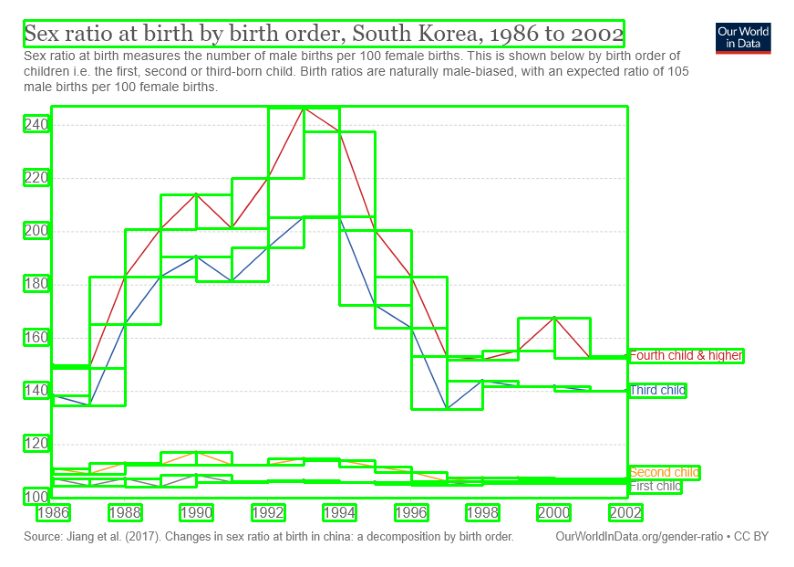

In [79]:
import matplotlib.pyplot as plt

data_dict = unique_pie_info[1]['value_json_list']['data'][0]
image_name = data_dict['json_name'].replace('.json', '.png')
image_path = os.path.join(train_folder_images, image_name)

# Read the image
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Create a copy of the image to annotate
image_copy = image.copy()
# Annotate the image using the deep_first_search_plot function
annotated_img = deep_first_search_plot(data_dict, image_copy)
pprint(data_dict)
# Display the annotated image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(annotated_img[:, :, ::-1])  # Convert BGR (OpenCV) to RGB (Matplotlib)
plt.axis('off')  # Remove axes for better visualization
plt.show()

{'general_figure_info': {'figure_info': {'bbox': {'h': 'value',
                                                  'w': 'value',
                                                  'x': 'value',
                                                  'y': 'value'}},
                         'title': {'bbox': {'h': 'value',
                                            'w': 'value',
                                            'x': 'value',
                                            'y': 'value'},
                                   'text': 'value'},
                         'x_axis': {'major_labels': {'bboxes': [{'h': 'value',
                                                                 'w': 'value',
                                                                 'x': 'value',
                                                                 'y': 'value'}],
                                                     'values': ['value']}},
                         'y_axis': {'major_labels': {'bboxes':

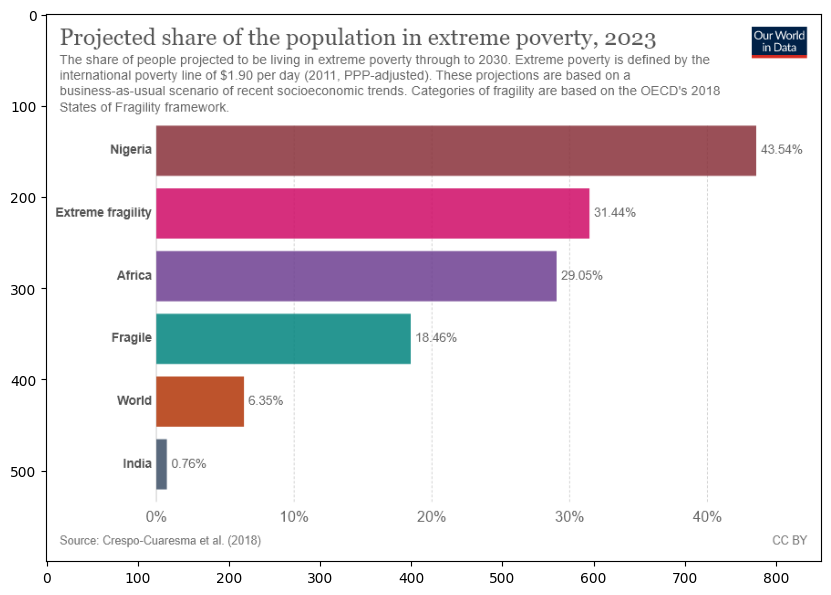

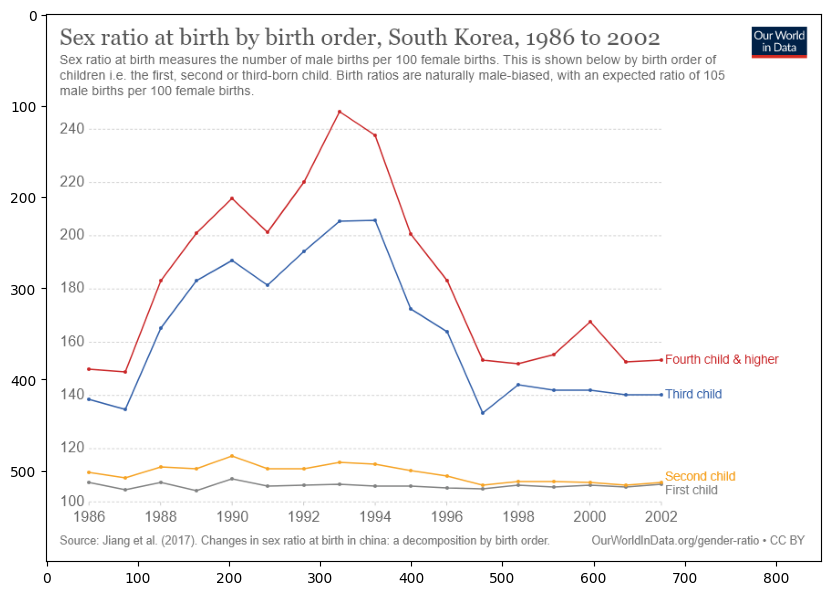

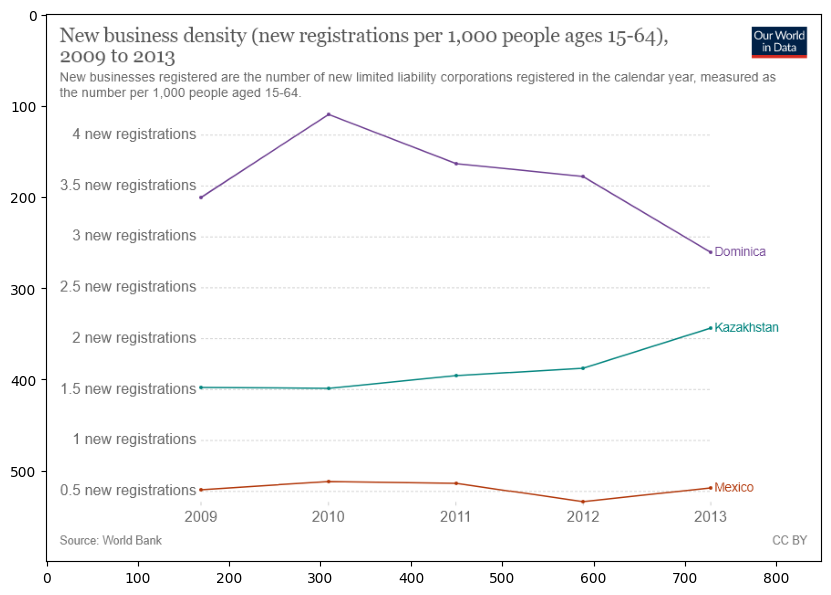

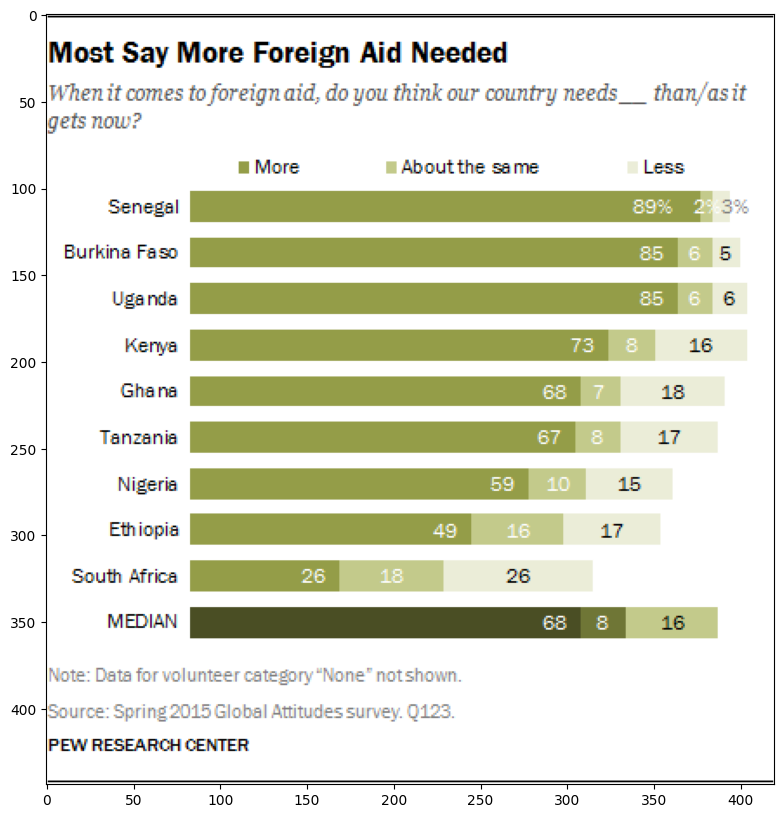

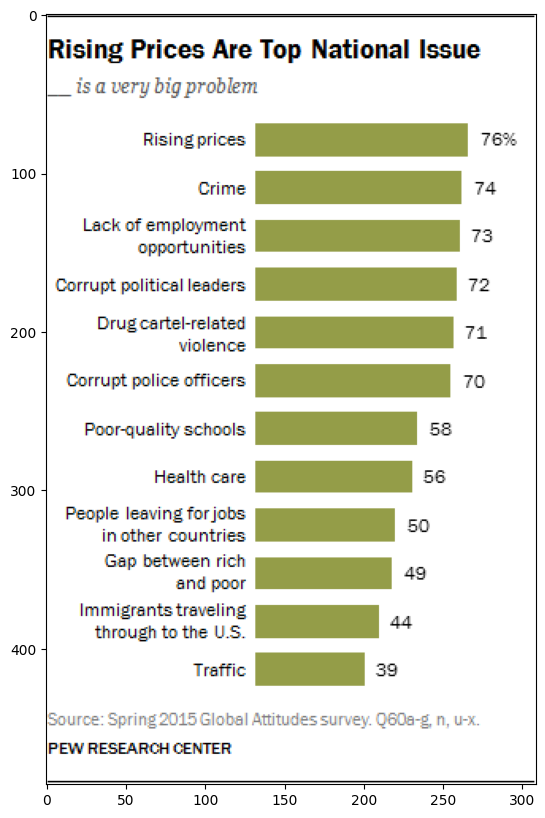

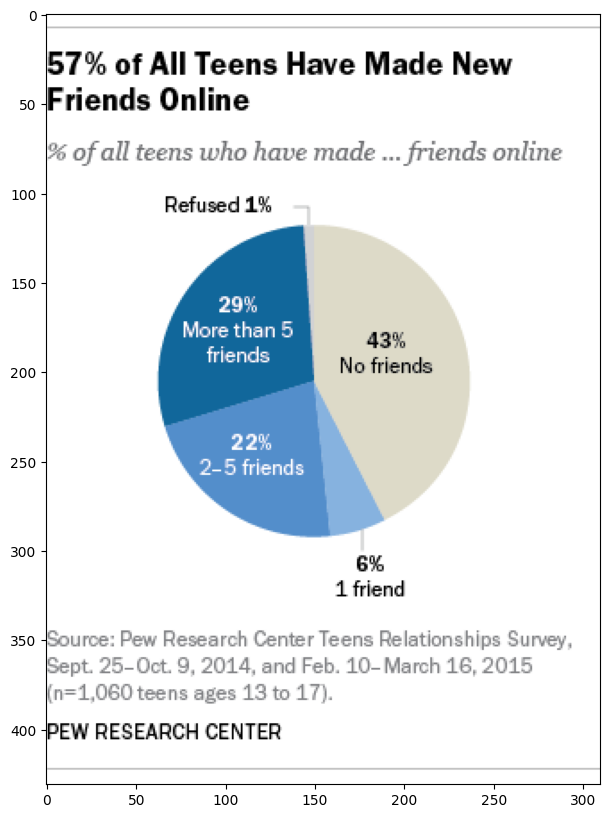

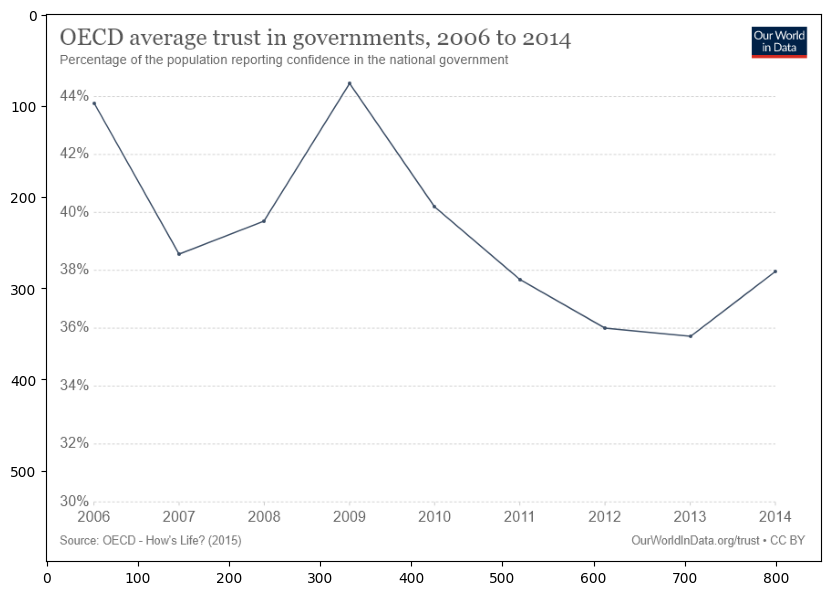

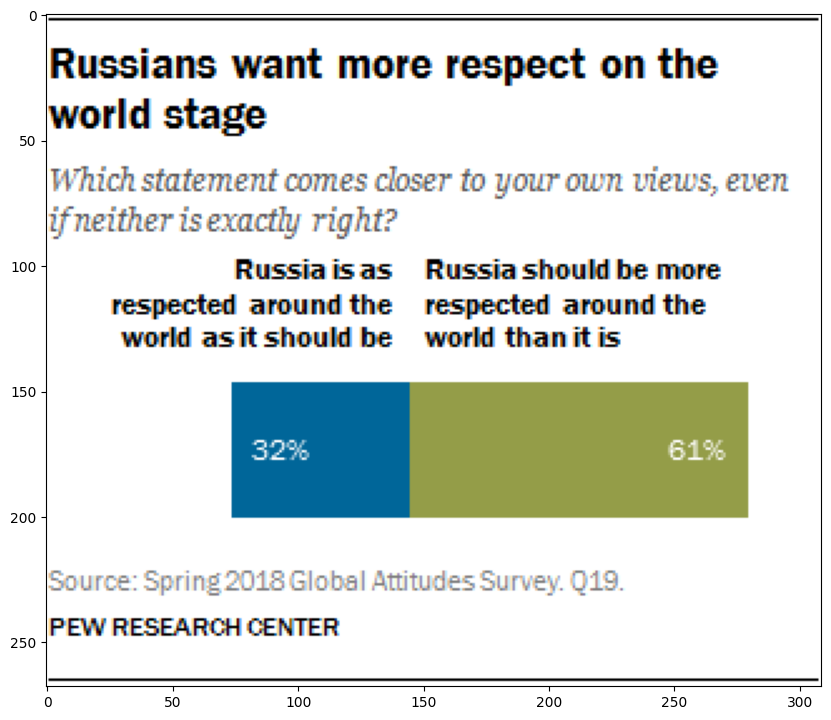

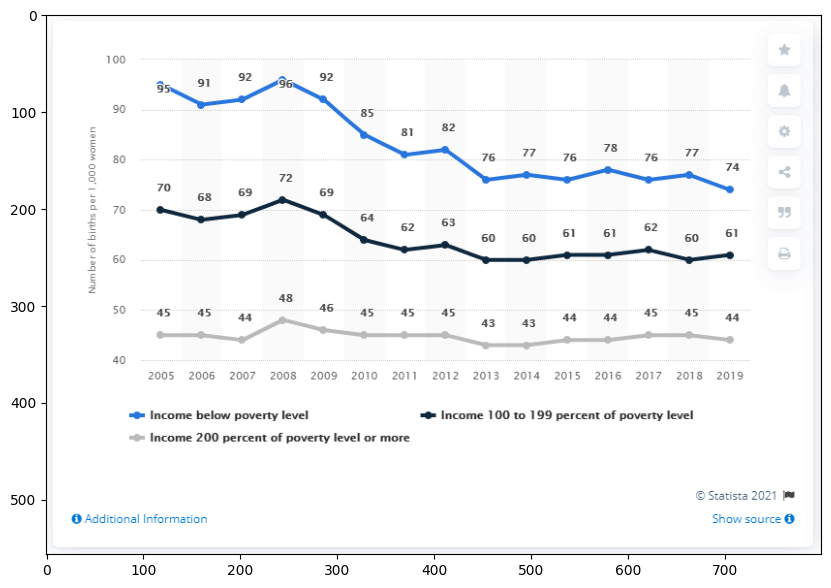

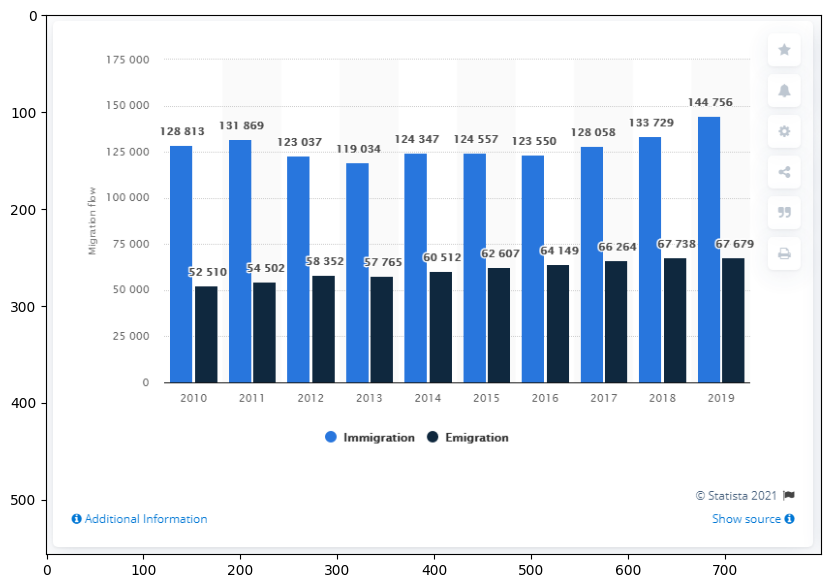

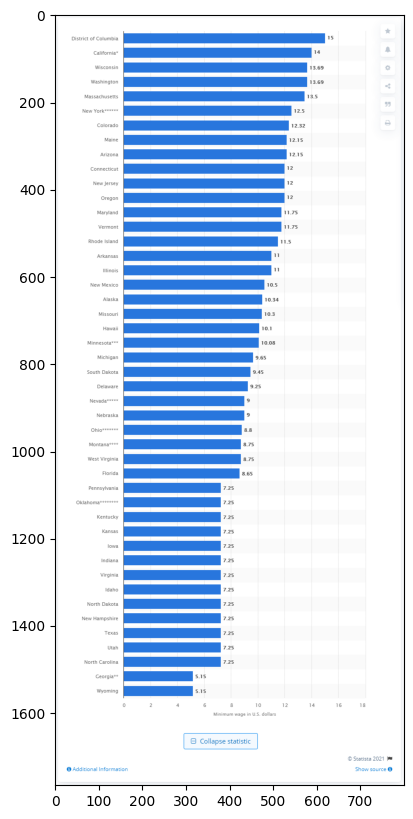

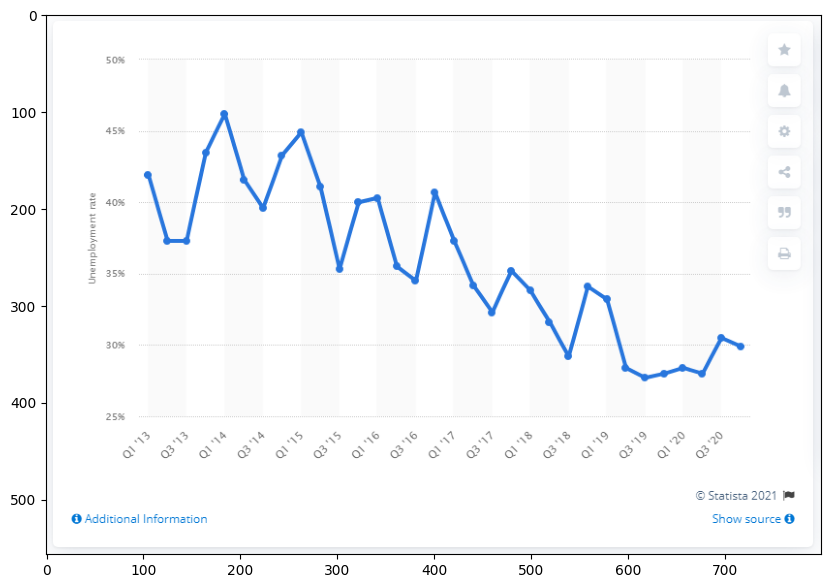

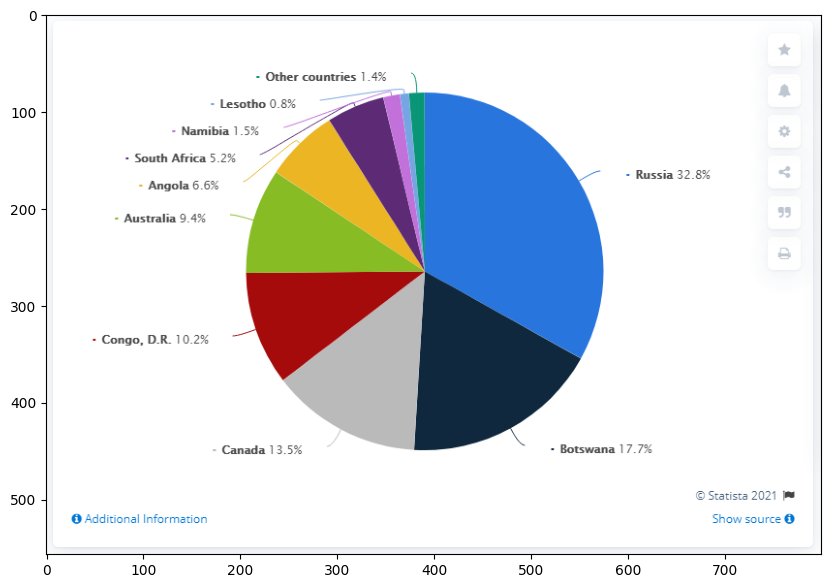

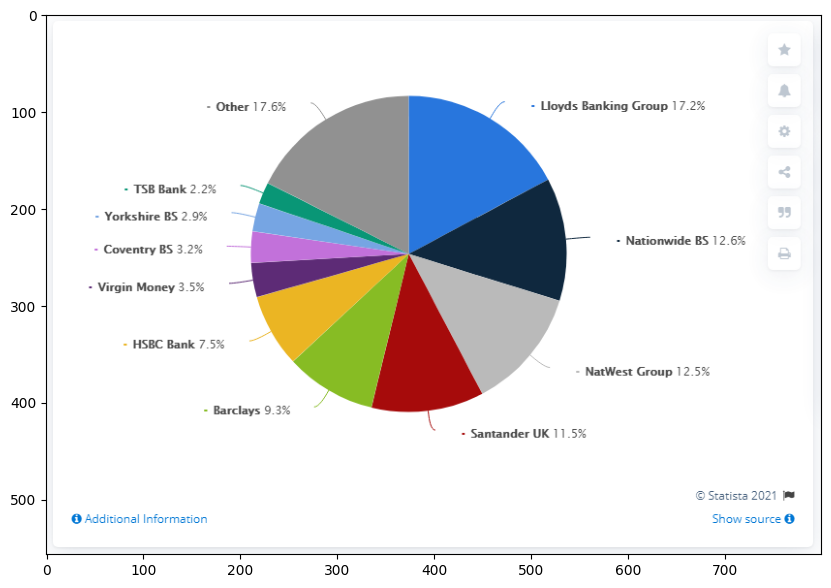

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

for i in range(len(unique_pie_info)):
    data_dict = unique_pie_info[i]['value_json_list']['data'][0]
    # data_dict = unique_pie_info[random_num]['value_json_list']['data'][0]
    # pprint(data_dict['data'])
    structure = unique_pie_info[i]['structure']
    pprint(structure)
    print("#"*100)
    with open('../debug/log.txt', 'a') as f:
        f.write(f'{structure}\n')
        f.write("#"*100+'\n')
    image_name = data_dict['json_name'].replace('.json', '.png')
    image_path = os.path.join(train_folder_images, image_name)
    image = cv2.imread(image_path)
        # Create a copy of the image to annotate
    image_copy = image.copy()
    # Annotate the image using the deep_first_search_plot function
    annotated_img = deep_first_search_plot(data_dict, image_copy)
    write_path = f'../debug/output/{i}.png'
    os.makedirs(os.path.dirname(write_path), exist_ok=True)
    cv2.imwrite(write_path, annotated_img)
    plt.figure(figsize=(10,10))
    plt.imshow(image[:, :, ::-1])

In [ ]:
data = {'models': [{'bbox': {'h': 'value', 'w': 'value', 'x': 'value', 'y': 'value'},
             'color': 'value',
             'points': {'center': {'x': 'value', 'y': 'value'},
                        'end': {'x': 'value', 'y': 'value'},
                        'start': {'x': 'value', 'y': 'value'}}}],
 'type': 'value'}